In [2]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# DATA SET

In [3]:
#Directory inicial
base_dir = './cowimages/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#Directorio de entrenamiento
train_normal_dir = os.path.join(train_dir, 'normal')
train_escualida_dir = os.path.join(train_dir, 'escualida')
train_gorda_dir = os.path.join(train_dir, 'gorda')

#Directorio de validacion normal
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_escualida_dir = os.path.join(validation_dir, 'escualida')
validation_gorda_dir = os.path.join(validation_dir, 'gorda')

In [7]:
#Revisamos los nombres de las imagenes
train_normal_fnames = os.listdir(train_normal_dir)
train_escualida_fnames = os.listdir(train_escualida_dir)
train_gorda_fnames = os.listdir(train_gorda_dir)

print("Imagenes NORMAL:", train_normal_fnames[:10])
print("Imagenes escualida:", train_escualida_fnames[:10])
print("Imagenes gorda:", train_gorda_fnames[:10])

Imagenes NORMAL: ['IMG_20191212_113753.jpg', 'IMG_20191212_114159.jpg', 'IMG_20191215_133306_BURST15.jpg', 'IMG_20191215_133306_BURST3.jpg', 'IMG_20191215_133321_BURST29.jpg', 'IMG_20191215_133321_BURST33.jpg', 'IMG_20191215_133321_BURST51.jpg', 'IMG_20191215_133511_BURST1.jpg', 'IMG_20191215_133534_BURST13.jpg', 'IMG_20191215_133534_BURST15.jpg']
Imagenes escualida: ['IMG_20191212_113230.jpg', 'IMG_20191212_113354.jpg', 'IMG_20191212_113854.jpg', 'IMG_20191212_114134.jpg', 'IMG_20191212_114149.jpg', 'IMG_20191215_133413_BURST25.jpg', 'IMG_20191215_133413_BURST27.jpg', 'IMG_20191215_133413_BURST55.jpg', 'IMG_20191215_133717_BURST25.jpg', 'IMG_20191215_133805_BURST1.jpg']
Imagenes gorda: []


In [8]:
print('Total training normal:', len(os.listdir(train_normal_dir)))
print('Total training escualida:', len(os.listdir(train_escualida_dir)))
print('Total training gorda:', len(os.listdir(train_gorda_dir)))

print('Total validation normal:', len(os.listdir(validation_normal_dir)))
print('Total validation escualida:', len(os.listdir(validation_escualida_dir)))
print('Total validation gorda:', len(os.listdir(validation_gorda_dir)))

Total training normal: 24
Total training escualida: 21
Total training gorda: 0
Total validation normal: 4
Total validation escualida: 3
Total validation gorda: 0


# VISUALIZACION

In [9]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

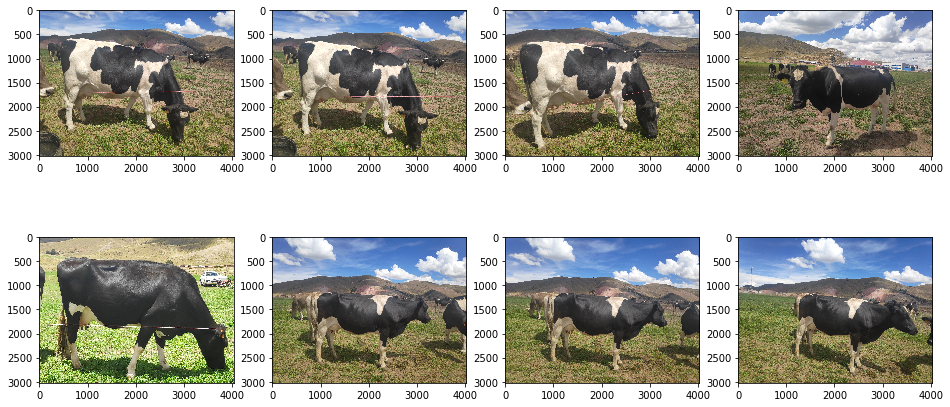

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_normal_pix = [os.path.join(train_normal_dir, fname) for fname in train_normal_fnames[pic_index-4:pic_index]]

next_covid_pix = [os.path.join(train_escualida_dir, fname) for fname in train_escualida_fnames[ pic_index-4:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_covid_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    #sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show();

Vemos que las primeras 4 representan radiografías normales, y las segundas representan a personas con COVID19

**Nota:** es conveniente agregar alguna marca o titulo para diferenciar las normales de las covid19

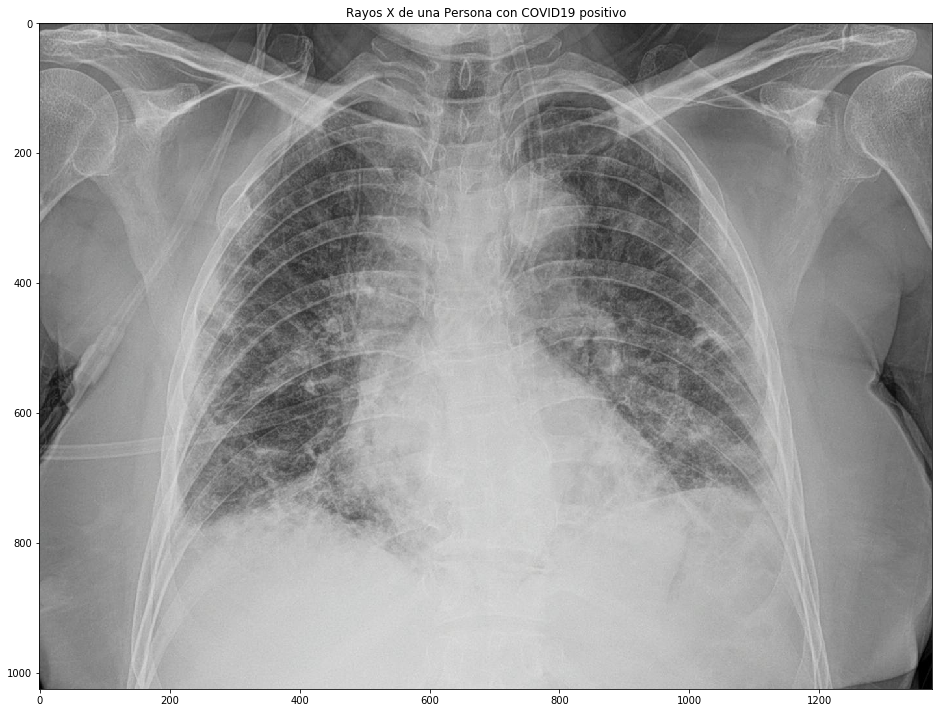

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*8)
img = mpimg.imread(os.path.join(train_escualida_dir, train_escualida_fnames[0]))
plt.title("Vaca escualida")
plt.imshow(img);

# CREACION DE UN MODELO REFERENCIAL

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\python\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1ty

In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 1 for the other ('covid')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### PREPROCESAMIENTO DE LA DATA

In [14]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(300, 300))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (300, 300))

Found 60 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=3,
                    epochs=100,
                    validation_steps=1,
                    verbose=1)

Epoch 1/100
3/3 [==============================] - 7s 2s/step - loss: 1.4367 - acc: 0.4167 - val_loss: 0.6711 - val_acc: 0.6111
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 0.7869 - acc: 0.6500 - val_loss: 0.6683 - val_acc: 0.6111
Epoch 3/100
3/3 [==============================] - 4s 1s/step - loss: 0.6438 - acc: 0.6500 - val_loss: 0.6472 - val_acc: 0.6111
Epoch 4/100
3/3 [==============================] - 4s 1s/step - loss: 0.6174 - acc: 0.6500 - val_loss: 0.6420 - val_acc: 0.6111
Epoch 5/100
3/3 [==============================] - 4s 1s/step - loss: 0.5963 - acc: 0.6500 - val_loss: 0.6557 - val_acc: 0.6111
Epoch 6/100
3/3 [==============================] - 4s 1s/step - loss: 0.5080 - acc: 0.6500 - val_loss: 0.5838 - val_acc: 0.6111
Epoch 7/100
3/3 [==============================] - 4s 1s/step - loss: 0.4789 - acc: 0.6500 - val_loss: 0.5964 - val_acc: 0.6111
Epoch 8/100
3/3 [==============================] - 4s 1s/step - loss: 0.4269 - acc: 0.8000 - val_loss: 0

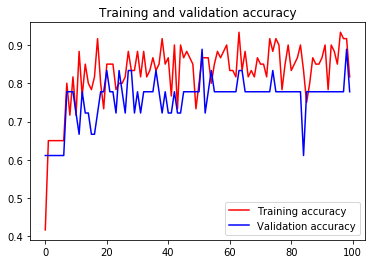

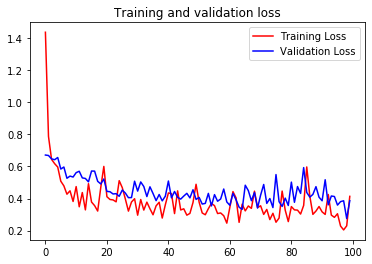

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
from skimage.transform import resize
import numpy as np

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['../imagenes/y050.png', '../imagenes/x031.png', '../imagenes/muestra3.png']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (300, 300),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = model.predict(test_X)
#resultado, mensaje = datos.get('result'), datos.get('message')
for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], img_tagged.tolist().index(max(img_tagged)) )

../imagenes/y050.png 0
../imagenes/x031.png 0
../imagenes/muestra3.png 0


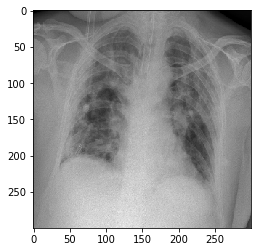

In [65]:
from keras.preprocessing import image
img = image.load_img("../imagenes/muestra3.png",target_size=(300,300))
img = np.asarray(img)
#img = image.img_to_array(img)

plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model

In [63]:
predicted_classes = model.predict(img)
predicted_classes[0]

array([1.], dtype=float32)

In [64]:
answer = np.argmax(predicted_classes)
answer

0